**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sklearn.preprocessing import MinMaxScaler as mms
import numpy as np
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date
plt.style.use('fivethirtyeight')

**Input the name of the NASDAQ name of the Company to predict the Stock Price**

In [2]:
name = input()
e = date.today()
s = e.replace(year=e.year-10)

AAPL


**Creating the Data Frame using Yahoo as the Data Source**

In [3]:
df = web.DataReader(name, data_source = 'yahoo', start= s, end = e)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-15,11.535714,11.399643,11.428572,11.441428,417312000.0,9.789804
2010-12-16,11.521786,11.432143,11.467500,11.473214,322030800.0,9.817002
2010-12-17,11.492500,11.436786,11.486786,11.450357,386929200.0,9.797442
2010-12-20,11.544642,11.365357,11.485714,11.507500,385610400.0,9.846340
2010-12-21,11.585357,11.501785,11.535714,11.578571,256354000.0,9.907149
...,...,...,...,...,...,...
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999
2020-12-10,123.870003,120.150002,120.500000,123.239998,81312200.0,123.239998


In [4]:
df.shape

(2517, 6)

**Visualizing the Closing Price of Stocks**

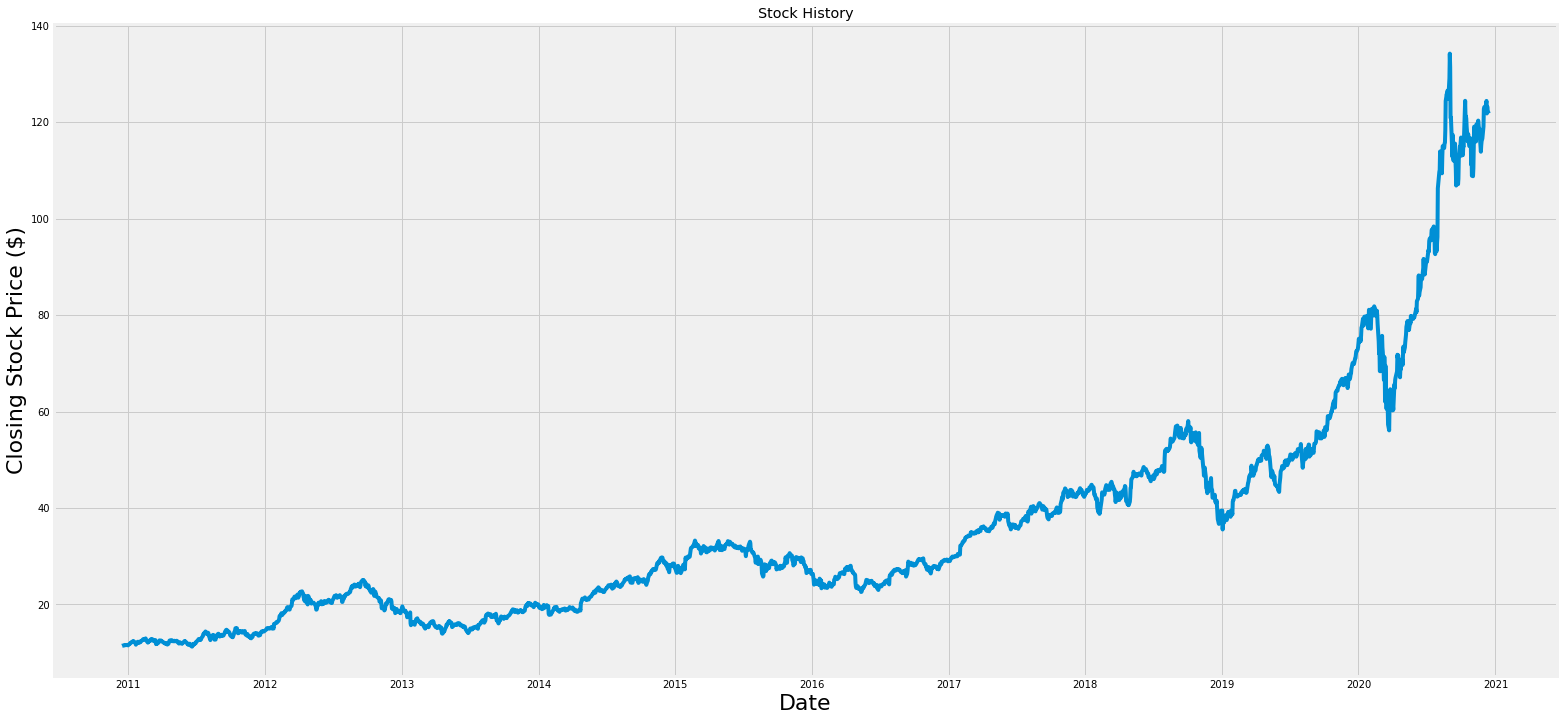

In [5]:
plt.figure(figsize = (24,12))
plt.title('Stock History')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Closing Stock Price ($)', fontsize = 22)
plt.plot(df['Close'])
plt.show()

**Training the model with 80% of the Data**

In [6]:
data = df.filter(['Close'])
ds = data.values
training = m.ceil(len(ds)*0.8)
training

2014

**Scaling of Data**

In [7]:
sc = mms(feature_range=(0,1))
sd = sc.fit_transform(ds)
sd

array([[0.00146438],
       [0.00172297],
       [0.00153702],
       ...,
       [0.91099803],
       [0.90424564],
       [0.89912025]])

1.   Creating **Training** Dataset
2.   Creating **Scaled Training** Dataset
3.   **Spliting** the Dataset into **Two** Datasets



In [8]:
td = sd[0:training, :]
x_train = []
y_train = []
for i in range(60,len(td)):
  x_train.append(td[i-60 : i, 0])
  y_train.append(td[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00146438, 0.00172297, 0.00153702, 0.0020019 , 0.0025801 ,
       0.00285903, 0.00240577, 0.00271957, 0.00294911, 0.00289681,
       0.00242321, 0.0021036 , 0.00414037, 0.00464012, 0.00542752,
       0.00534906, 0.00604349, 0.00788269, 0.00764734, 0.00845507,
       0.00882117, 0.00963471, 0.00735969, 0.00683379, 0.00504399,
       0.0033123 , 0.00642992, 0.0075776 , 0.00828946, 0.0081035 ,
       0.00603768, 0.00697325, 0.00863231, 0.00842602, 0.00817033,
       0.00905942, 0.01062259, 0.01158723, 0.01244726, 0.01139546,
       0.01206664, 0.01274363, 0.01295283, 0.01389131, 0.01248794,
       0.01023907, 0.00676696, 0.00793208, 0.00800762, 0.00954174,
       0.01100903, 0.00987587, 0.01069233, 0.01285404, 0.01298188,
       0.01163371, 0.01174994, 0.01079402, 0.00910881, 0.01065456])]
[0.011110722664544423]



**Converting x_train and y_train to numpy array**

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1954, 60, 1)

**LSTM Model**

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 44s 22ms/step - loss: 3.2476e-04


1.   **Creating testing Dataset**
2.   **Creating a new array containing scaled values from index 1695 to 2193**



In [13]:
td = sd[training - 60 : , :]
x_test = []
y_test = ds[training : , :]
for i in range (60, len(td)):
  x_test.append(td[i - 60 : i, 0])

**Converting the test data to numpy array**

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)


Thus predictions are exactly similar to y_test

**Root Mean Square Error**

In [17]:
rms = np.sqrt(np.mean(predictions - y_test) ** 2)
rms

1.5147408851335347

**Plotting the data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


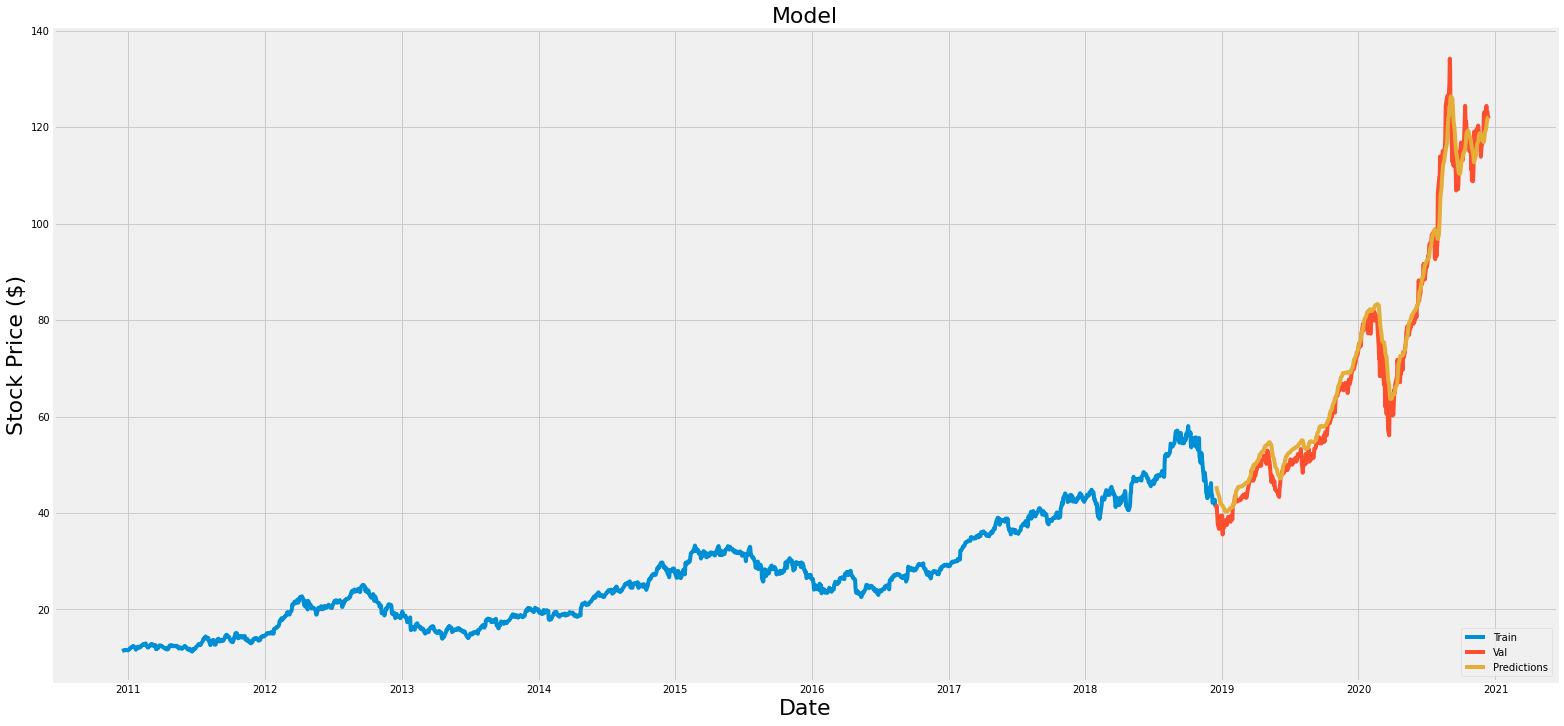

In [18]:
train = data[ : training] 
valid = data[training : ]
valid['Predictions'] = predictions
plt.figure(figsize = (24,12))
plt.title('Model',fontsize = 22)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Stock Price ($)',fontsize = 22)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [19]:
valid

,Close,Predictions
Date,,
2018-12-17,40.985001,45.541023
2018-12-18,41.517502,45.211102
2018-12-19,40.222500,44.924694
2018-12-20,39.207500,44.585770
2018-12-21,37.682499,44.159256
...,...,...
2020-12-08,124.379997,120.369125
2020-12-09,121.779999,121.100685
2020-12-10,123.239998,121.533081
